In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

Making the Matrix for the path

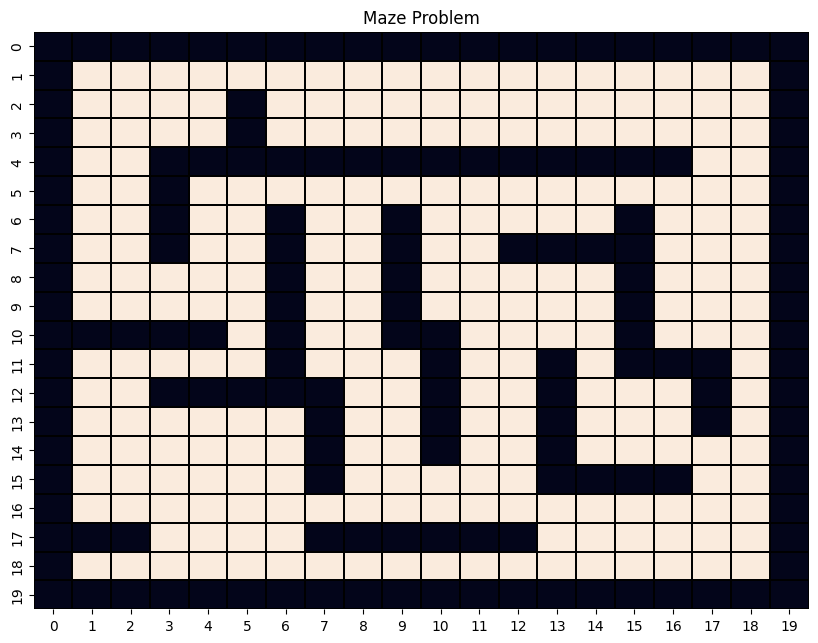

In [2]:
State_Matrix = np.array([[255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
              [255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,255],
              [255, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255],
              [255, 0, 0, 255, 255, 255, 255,255,255,255,255,255,255,255,255, 255, 255, 0, 0, 255],
              [255, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,255],
              [255, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 255, 0, 0, 0, 255],
              [255, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 255, 255, 255, 255, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 255, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 255, 0, 0, 0,255],
              [255, 255, 255, 255, 255, 0, 255, 0, 0, 255, 255, 0, 0, 0, 0, 255, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 255, 0,0 , 0, 255, 0, 0, 255, 0, 255, 255, 255, 0, 255],
              [255, 0, 0, 255, 255, 255, 255, 255,0,0, 255, 0, 0, 255, 0, 0, 0, 255, 0, 255],
              [255, 0, 0, 0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 0, 255, 0,255],
              [255, 0, 0, 0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255],
              [255, 255, 255, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255],
              [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255]])


plt.subplots(figsize=(10,7.5))
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
plt.title('Maze Problem')
plt.show()

Required Functions for processing

In [3]:
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state):

    for i in range(len(oil_states)):    # Adding red oil blocks
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='red', edgecolor='red', lw=0.25))

    for i in range(len(bump_states)):   # Adding salmon bump blocks
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='lightsalmon', edgecolor='lightsalmon', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='lightblue', edgecolor='lightblue', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='lightgreen', edgecolor='lightgreen', lw=0.25))

In [4]:
def value_function_plot(x_ans,p,gamma):
  plt.subplots(figsize=(18,12))
  heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, annot= x_ans, linecolor='black',cbar= False, cmap= 'rocket_r')

  coloring_blocks(heatmap, oil_states= Oil,
                  bump_states= Bumps,
                  start_state= Start,
                  end_state= Finish)

  plt.title('Maze Problem: Optimal Value Function with p = ' + str(p) + ' and gamma = ' + str(gamma))
  plt.show()

In [5]:
def policy_plot(Pi_optimal,p,gamma):
  Pi_show = np.chararray((20,20))

  for i in range(18):
    for j in range(18):
      action = Pi_optimal[i,j]

      if action == 0 :    #Left
        Pi_show[i+1,j+1] ='L'
      elif action == 1 :  #Up
        Pi_show[i+1,j+1] = 'U'
      elif action == 2 :  #Right
        Pi_show[i+1,j+1] = 'R'
      elif action == 3:   #Down
        Pi_show[i+1,j+1] = 'D'

      if State_Matrix[i,j] == 255:
        Pi_show[i,j] = ' '

  Pi_show = np.array(Pi_show,dtype = str)
  plt.subplots(figsize=(10,7.5))
  heatmap = sns.heatmap(State_Matrix, fmt="s", linewidths=0.25, annot = Pi_show, linecolor='black',cbar= False, cmap= 'rocket_r')

  coloring_blocks(heatmap, oil_states= Oil,
                  bump_states= Bumps,
                  start_state= Start,
                  end_state= Finish)

  plt.title('Maze Problem: Optimal Policy with p = ' + str(p) +  ' and gamma = ' + str(gamma))
  plt.show()

In [6]:
def Path_Planning(Pi):
  path_x = []
  path_y = []
  all_action = []

  path_x.append(15)
  path_y.append(4)

  i, j = 14, 3
  action = Pi[14,3]
  all_action.append(action)

  while True:

    if action == 0:
      path_x.append(i+1)
      j-=1
      path_y.append(j+1)

    elif action == 1:
      i-=1
      path_x.append(i+1)
      path_y.append(j+1)

    elif action == 2:
      path_x.append(i+1)
      j+=1
      path_y.append(j+1)

    elif action == 3:
      i+=1
      path_x.append(i+1)
      path_y.append(j+1)

    else:
      continue

    action = Pi[i,j]
    all_action.append(action)
    if (i==2 and j==12):
      break

  return all_action, path_x, path_y

In [7]:
def Get_path(Pi,p,gamma):

  all_action, path_x, path_y = Path_Planning(Pi)
  path = np.vstack((path_x,path_y,all_action))
  path = (np.rint(path)).astype(int)


  plt.subplots(figsize=(10,7.5))
  heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',cbar= False, cmap= 'rocket_r')

  coloring_blocks(heatmap, oil_states= Oil,
                  bump_states= Bumps,
                  start_state= Start,
                  end_state= Finish)


  for i in range(path.shape[1]-1):
      x = path[0][i] # x_coordinate
      c = path[1][i] # y_coordinate
      direction = path[2][i] # action

      if direction == 0:
          plt.arrow(c + 0.5, x + 0.5, -0.8, 0, width=0.08, color='black')  # Left

      if direction == 1:
          plt.arrow(c + 0.5, x + 0.5, 0, -0.8, width=0.08, color='black')  # Up

      if direction == 2:
          plt.arrow(c + 0.5, x + 0.5, 0.8, 0, width=0.08, color='black')   # Right

      if direction == 3:
          plt.arrow(c + 0.5, x + 0.5, 0, 0.8, width=0.08, color='black')  # Down

  # Show plot
  plt.title('Maze Problem: Optimal Path with p = ' + str(p) +  ' and gamma = ' + str(gamma))
  plt.show()

In [8]:
def next_state(i,j):

  #Left desired
  if (i+1,j+1-1) in Oil:
    R1 = -1-5
    ns_x_left = i+1
    ns_y_left = j+1-1

  elif (i+1,j+1-1) in Bumps:
    R1 = -1-10
    ns_x_left = i+1
    ns_y_left = j+1-1

  elif (i+1,j+1-1) in Goal:
    R1 = -1+200
    ns_x_left = i+1
    ns_y_left = j+1-1

  elif State_Matrix[i+1,j+1-1] == 255:
    R1 = -1
    ns_x_left = i+1
    ns_y_left = j+1

  else:
    R1 = -1
    ns_x_left = i+1
    ns_y_left = j+1-1

  #Up action taken
  if (i+1-1,j+1) in Oil:
    R2 = -6
    ns_x_up = i+1-1
    ns_y_up = j+1

  elif (i+1-1,j+1) in Bumps:
    R2 = -11
    ns_x_up = i+1-1
    ns_y_up = j+1

  elif (i+1-1,j+1) in Goal:
    R2 = -1+200
    ns_x_up = i+1-1
    ns_y_up = j+1

  elif State_Matrix[i+1-1,j+1] == 255:
    R2 = -1
    ns_x_up = i+1
    ns_y_up = j+1

  else:
    R2 = -1
    ns_x_up = i+1-1
    ns_y_up = j+1

#Right action taken
  if (i+1,j+1+1) in Oil:
    R3 = -6
    ns_x_right = i+1
    ns_y_right = j+1+1

  elif (i+1,j+1+1) in Bumps:
    R3 = -11
    ns_x_right = i+1
    ns_y_right = j+1+1

  elif (i+1,j+1+1) in Goal:
    R3 = -1+200
    ns_x_right = i+1
    ns_y_right = j+1+1

  elif State_Matrix[i+1,j+1+1] == 255:
    R3 = -1
    ns_x_right = i+1
    ns_y_right = j+1

  else:
    R3 = -1
    ns_x_right = i+1
    ns_y_right = j+1+1

#Down action taken
  if (i+1+1,j+1) in Oil:
    R4 = -6
    ns_x_down = i+1+1
    ns_y_down = j+1

  elif (i+1+1,j+1) in Bumps:
    R4 = -11
    ns_x_down = i+1+1
    ns_y_down = j+1

  elif (i+1+1,j+1) in Goal:
    R4 = -1 + 200
    ns_x_down = i+1+1
    ns_y_down = j+1

  elif State_Matrix[i+1+1,j+1] == 255:
    R4 = -1
    ns_x_down = i+1
    ns_y_down = j+1

  else:
    R4 = -1
    ns_x_down = i+1+1
    ns_y_down = j+1

  Rewards = [R1,R2,R3,R4]
  ns_x    = [ns_x_left, ns_x_up, ns_x_right, ns_x_down]
  ns_y    = [ns_y_left, ns_y_up, ns_y_right, ns_y_down]

  return Rewards, ns_x, ns_y

Obstacles & Detours

In [9]:
Bumps = [(1,11),(1,12),(2,1),(2,2),(2,3),(14,1),(14,2),(16,7),(15,17),(15,18),(12,11),(12,12),
                             (7,10),(7,11),(5,9),(5,17),(6,17),(7,17),(8,17),(5,1),(7,2)]

Oil = [(4,2),(5,6),(2,8),(2,16),(18,7),(17,14),(17,17),(16,10),(15,10),(10,18)]

Start = (15,4)
Finish = (3,13)

Goal = [(3,13)]

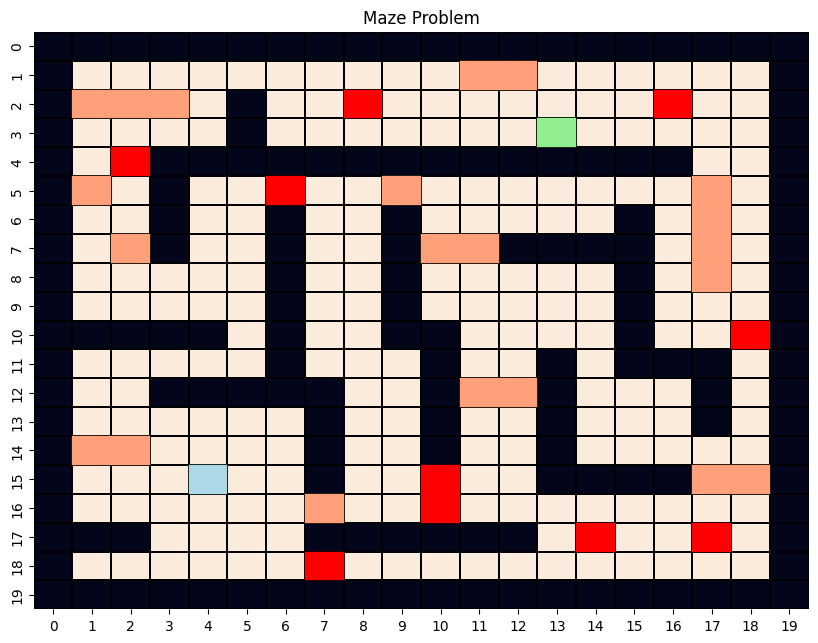

In [10]:
plt.subplots(figsize=(10,7.5))
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',cbar= False, cmap= 'rocket_r')

coloring_blocks(heatmap, oil_states= Oil,
                bump_states= Bumps,
                start_state= Start,
                end_state= Finish)

plt.title('Maze Problem')
plt.show()

##Policy Iteration

Policy Evaluation

In [11]:
def Policy_Evaluation(Vs_t, Policy,p,gamma,theta):
  p1 = 1 - p
  p2 = p/3

  x = 0
  V_oldd = Vs_t.copy()     #Vs_t = np.zeros((20,20))

  while True:

    V_neww = np.zeros((20,20))

    for i in range(18):
      for j in range(18):

        action = Policy[i][j]

        if State_Matrix[i+1,j+1] == 255: #Value is a wall
          continue

        Rewards, ns_x , ns_y = next_state(i,j)

        #exp1, exp2, exp3, exp4, new_val = 0, 0, 0, 0, 0

        R1 = Rewards[0]
        ns_left_x = ns_x[0]
        ns_left_y = ns_y[0]

        R2 = Rewards[1]
        ns_up_x = ns_x[1]
        ns_up_y = ns_y[1]

        R3 = Rewards[2]
        ns_right_x = ns_x[2]
        ns_right_y = ns_y[2]

        R4 = Rewards[3]
        ns_down_x = ns_x[3]
        ns_down_y = ns_y[3]

        #Action LEFT is desired by algorithm
        if action == 0:
          exp1 = p1* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
          exp2 = p2* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
          exp3 = p2* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
          exp4 = p2* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
          new_val = exp1 + exp2 + exp3 + exp4

        #Action UP is desired by algorithm
        elif action == 1:
          exp1 = p2* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
          exp2 = p1* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
          exp3 = p2* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
          exp4 = p2* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
          new_val = exp1 + exp2 + exp3 + exp4

        #Action RIGHT is desired by algorithm
        elif action == 2:
          exp1 = p2* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
          exp2 = p2* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
          exp3 = p1* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
          exp4 = p2* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
          new_val = exp1 + exp2 + exp3 + exp4

        #Action DOWN is desired by algorithm
        elif action == 3:
          exp1 = p2* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
          exp2 = p2* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
          exp3 = p2* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
          exp4 = p1* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
          new_val = exp1 + exp2 + exp3 + exp4

        else:
          continue

        """
        print("V co-ordinates: ", i+1,j+1)
        print(" Left R1: ", R1)
        print(" Up R2: ", R2)
        print(" Right R3: ", R3)
        print(" Down R4: ", R4)
        print("Action taken: ", action)
        print("Next co-ordinates x: ", ns_x)
        print("Next co-ordinates y: ", ns_y)
        print("New V Value: ", new_val)
        print()
        """

        #new_val = exp1 + exp2 + exp3 + exp4

        V_neww[i+1,j+1] = new_val
    #print(V_neww)

    diff = np.max(np.absolute(V_neww - V_oldd))
    #print(diff)

    if diff < theta:
      break

    else:
      V_oldd = V_neww.copy()
      x+=1

  return V_neww, x

Policy Improvement

In [12]:
def Policy_Iteration(V_try,Pi,p,gamma,theta):   #Improvement & Evaluation
  p1 = 1 - p
  p2 = p/3

  Pi_old = Pi.copy()
  V_oldd,_ = Policy_Evaluation(V_try,Pi_old,p,gamma,theta)    #Policy Evaluation

  #Policy Improvement
  while True:

    Pi_new = np.zeros((18,18))
    policy_stable = True

    for i in range(18):
      for j in range(18):

        action = Pi_old[i][j]

        if State_Matrix[i+1,j+1] == 255: #Value is a wall
          continue

        Rewards, ns_x , ns_y = next_state(i,j)

        R1 = Rewards[0]
        ns_left_x = ns_x[0]
        ns_left_y = ns_y[0]

        R2 = Rewards[1]
        ns_up_x = ns_x[1]
        ns_up_y = ns_y[1]

        R3 = Rewards[2]
        ns_right_x = ns_x[2]
        ns_right_y = ns_y[2]

        R4 = Rewards[3]
        ns_down_x = ns_x[3]
        ns_down_y = ns_y[3]

        #Left
        exp1 = p1* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
        exp2 = p2* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
        exp3 = p2* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
        exp4 = p2* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
        val_left = exp1 + exp2 + exp3 + exp4

        #Up
        exp1 = p2* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
        exp2 = p1* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
        exp3 = p2* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
        exp4 = p2* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
        val_up = exp1 + exp2 + exp3 + exp4

        #Right
        exp1 = p2* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
        exp2 = p2* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
        exp3 = p1* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
        exp4 = p2* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
        val_right = exp1 + exp2 + exp3 + exp4

        #Down
        exp1 = p2* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
        exp2 = p2* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
        exp3 = p2* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
        exp4 = p1* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
        val_down = exp1 + exp2 + exp3 + exp4

        """
        if(  max(exp1,exp2,exp3,exp4) == exp1):
          Pi_new[i,j] = 0      #Left
        elif(max(exp1,exp2,exp3,exp4) == exp2):
          Pi_new[i,j] = 1      #Up
        elif(max(exp1,exp2,exp3,exp4) == exp3):
          Pi_new[i,j] = 2      #Right
        elif(max(exp1,exp2,exp3,exp4) == exp4):
          Pi_new[i,j] = 3      #Down
        else:
          continue
        """

        if max(val_left, val_right, val_up, val_down) == val_left:
          Pi_new[i,j] = 0

        elif max(val_left, val_right, val_up, val_down) == val_up:
          Pi_new[i,j] = 1

        elif max(val_left, val_right, val_up, val_down) == val_right:
          Pi_new[i,j] = 2

        elif max(val_left, val_right, val_up, val_down) == val_down:
          Pi_new[i,j] = 3

        else:
          continue

    if np.array_equal(Pi_old, Pi_new) == True:
      policy_stable = True
      #V_neww,_ = Policy_Evaluation(V_oldd,Pi_new,p,gamma,theta)
      break

    else:
      policy_stable = False
      Pi_old = Pi_new.copy()
      V_neww,_ = Policy_Evaluation(V_oldd,Pi_old,p,gamma,theta)
      V_oldd = V_neww.copy()

  return Pi_new, V_oldd

A. 𝑝 = 0.02, 𝛾 = 0.95, 𝜃 = 0.01 (Base Scenario)

In [13]:
Pi_optimal_1a, V_optimal_1a = Policy_Iteration(np.zeros((20,20)), np.zeros((18,18)),p=0.02,gamma=0.95,theta=0.01)

	 	 	 	 	 	 	 Policy Iteration 



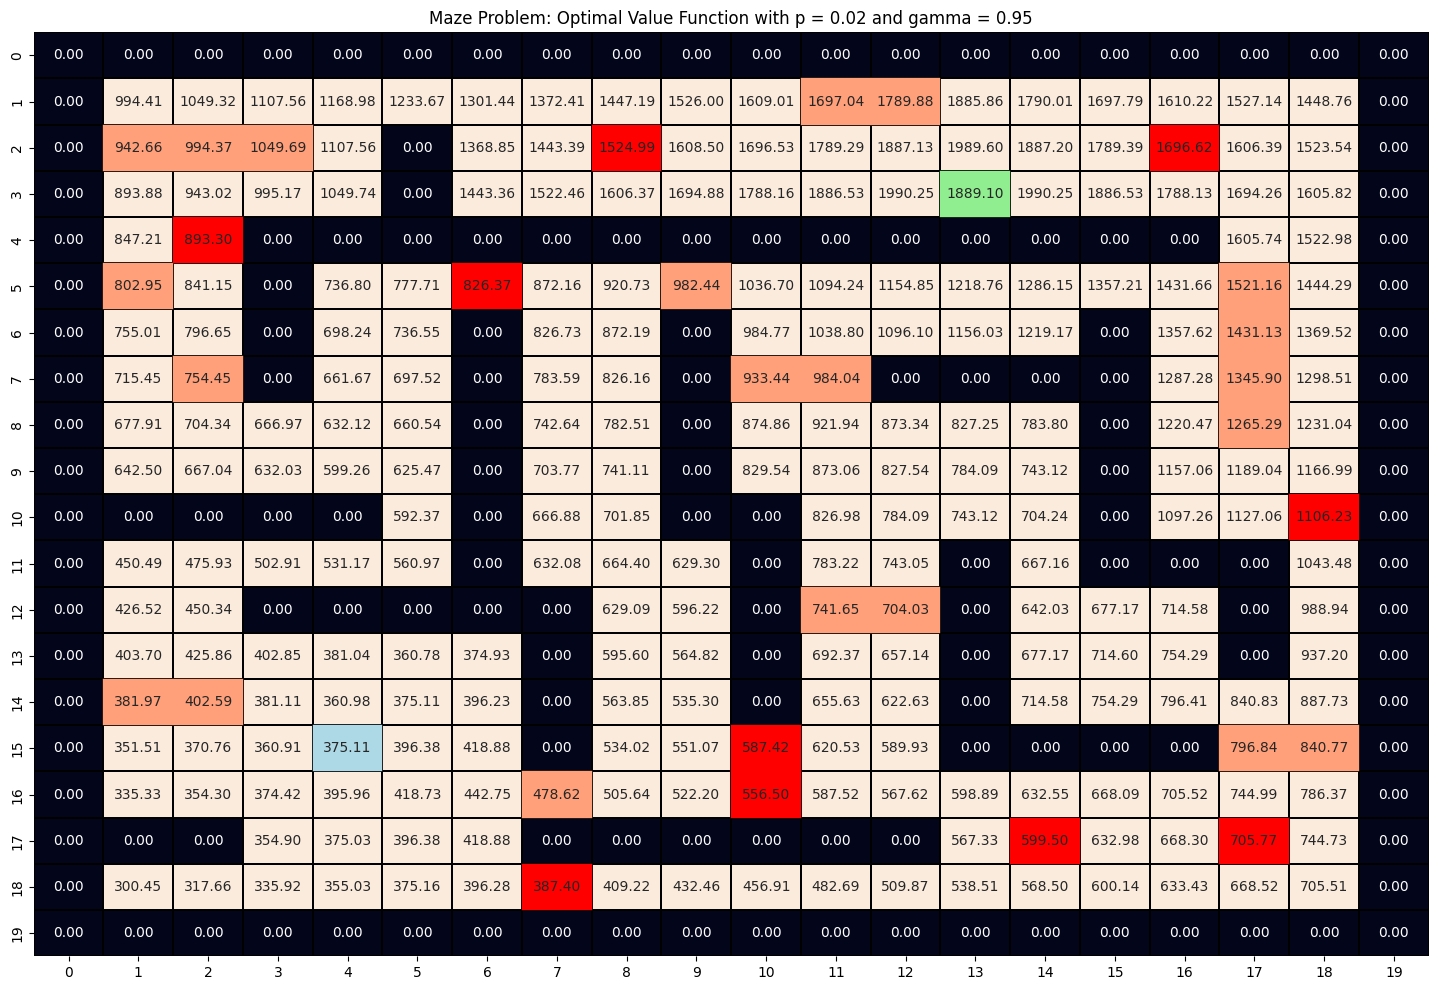

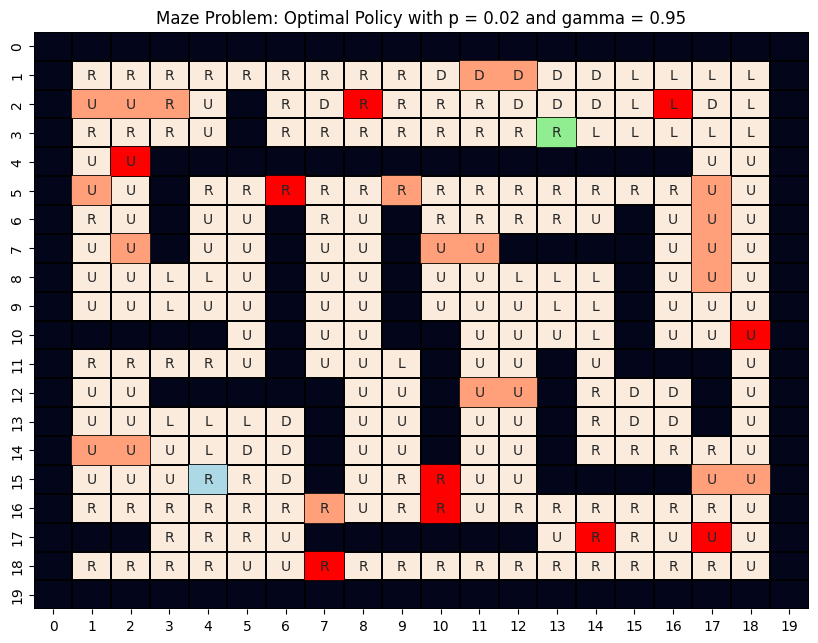

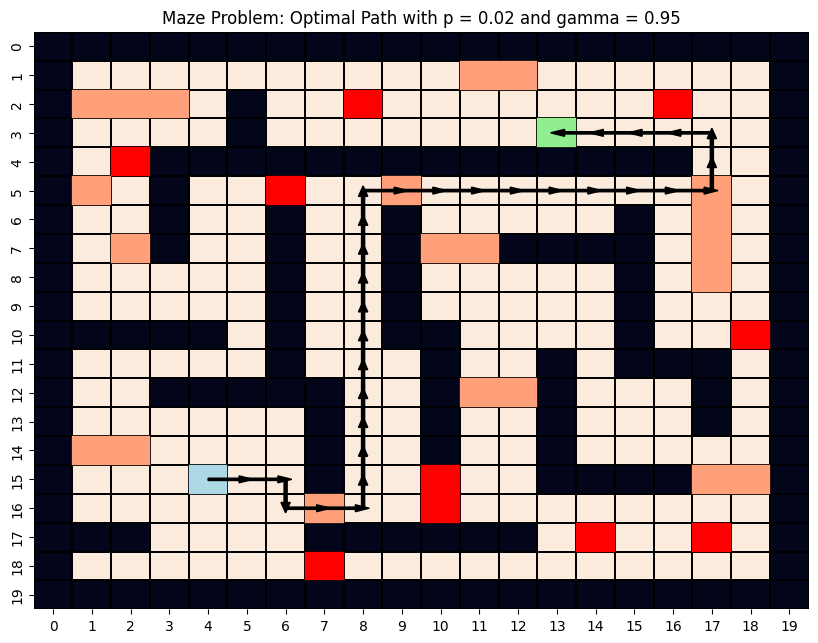

In [14]:
print("\t \t \t \t \t \t \t Policy Iteration \n")
value_function_plot(V_optimal_1a,p=0.02,gamma=0.95)
print()
policy_plot(Pi_optimal_1a,p=0.02,gamma=0.95)
print()
Get_path(Pi_optimal_1a,p=0.02,gamma=0.95)

B. 𝑝 = 0.5, 𝛾 = 0.95, 𝜃 = 0.01 (Large Stochasticity Scenario)

In [15]:
Pi_optimal_1b, V_optimal_1b = Policy_Iteration(np.zeros((20,20)), np.zeros((18,18)),p=0.5,gamma=0.95,theta=0.01)

	 	 	 	 	 	 	 Policy Iteration 



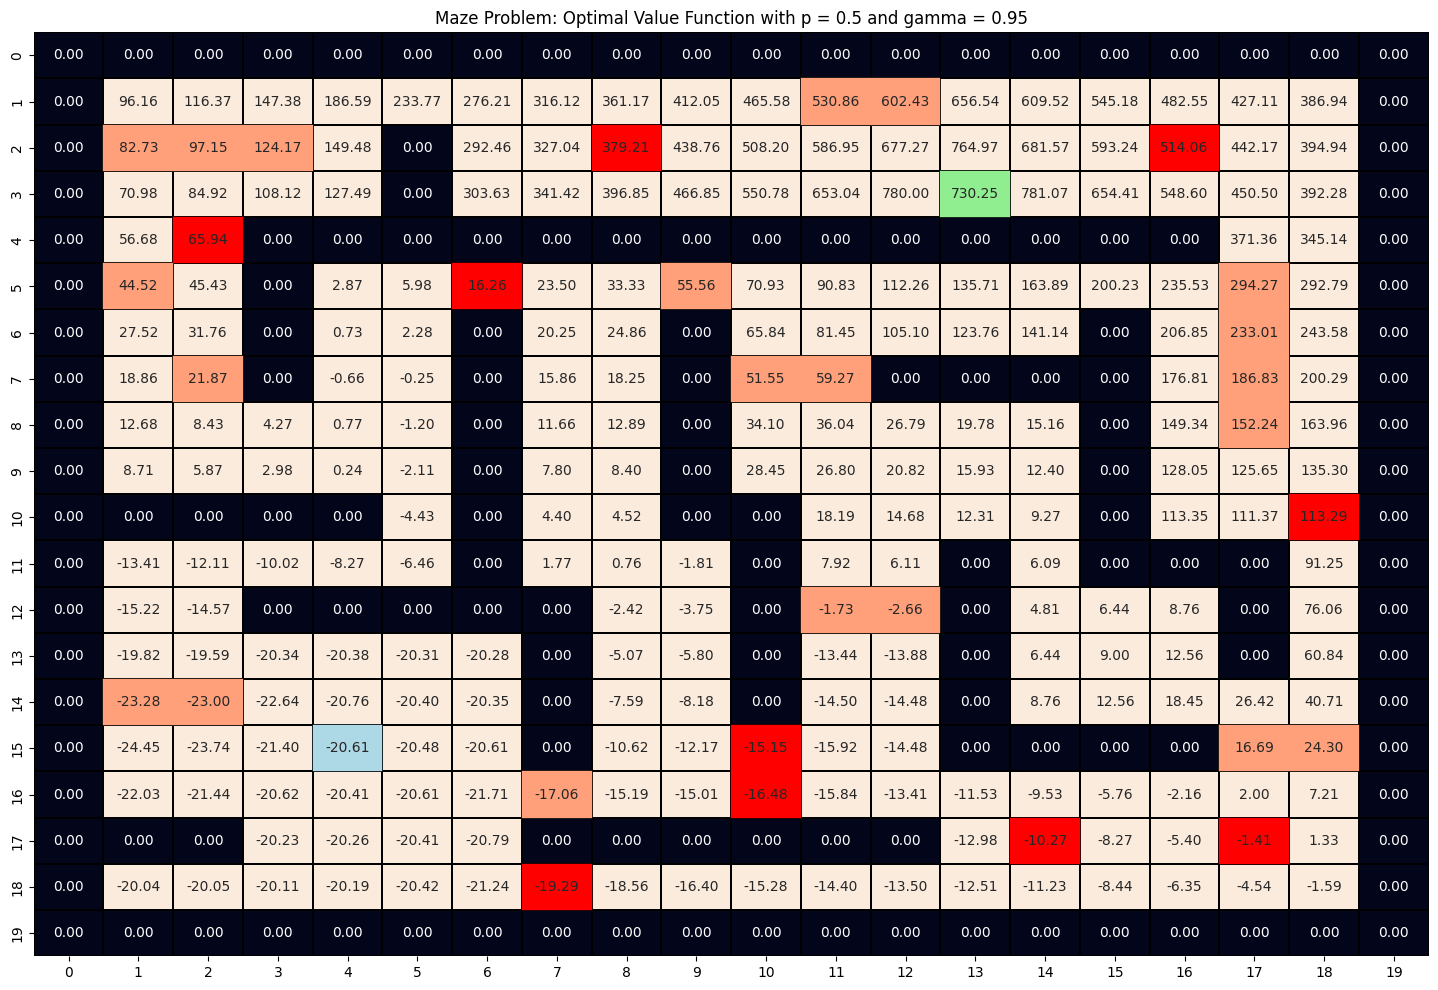

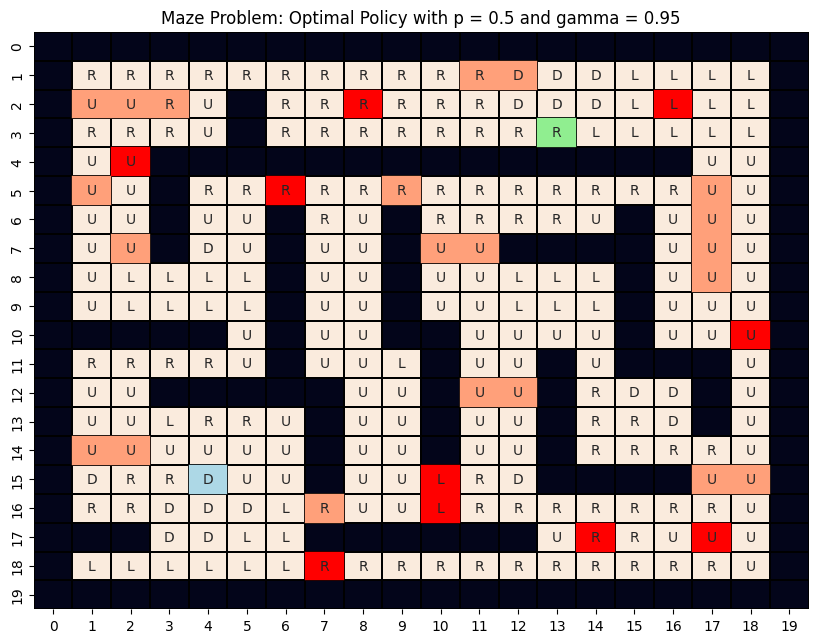

In [16]:
print("\t \t \t \t \t \t \t Policy Iteration \n")
value_function_plot(V_optimal_1b,p=0.5,gamma=0.95)
print()
policy_plot(Pi_optimal_1b,p=0.5,gamma=0.95)
print()
#Get_path(Pi_optimal_1b,p=0.5,gamma=0.95)

C. 𝑝 = 0.02, 𝛾 = 0.55, 𝜃 = 0.01 (Small Discount Factor Scenario)

In [17]:
Pi_optimal_1c, V_optimal_1c = Policy_Iteration(np.zeros((20,20)), np.zeros((18,18)),p=0.02,gamma=0.55,theta=0.01)

	 	 	 	 	 	 	 Policy Iteration 



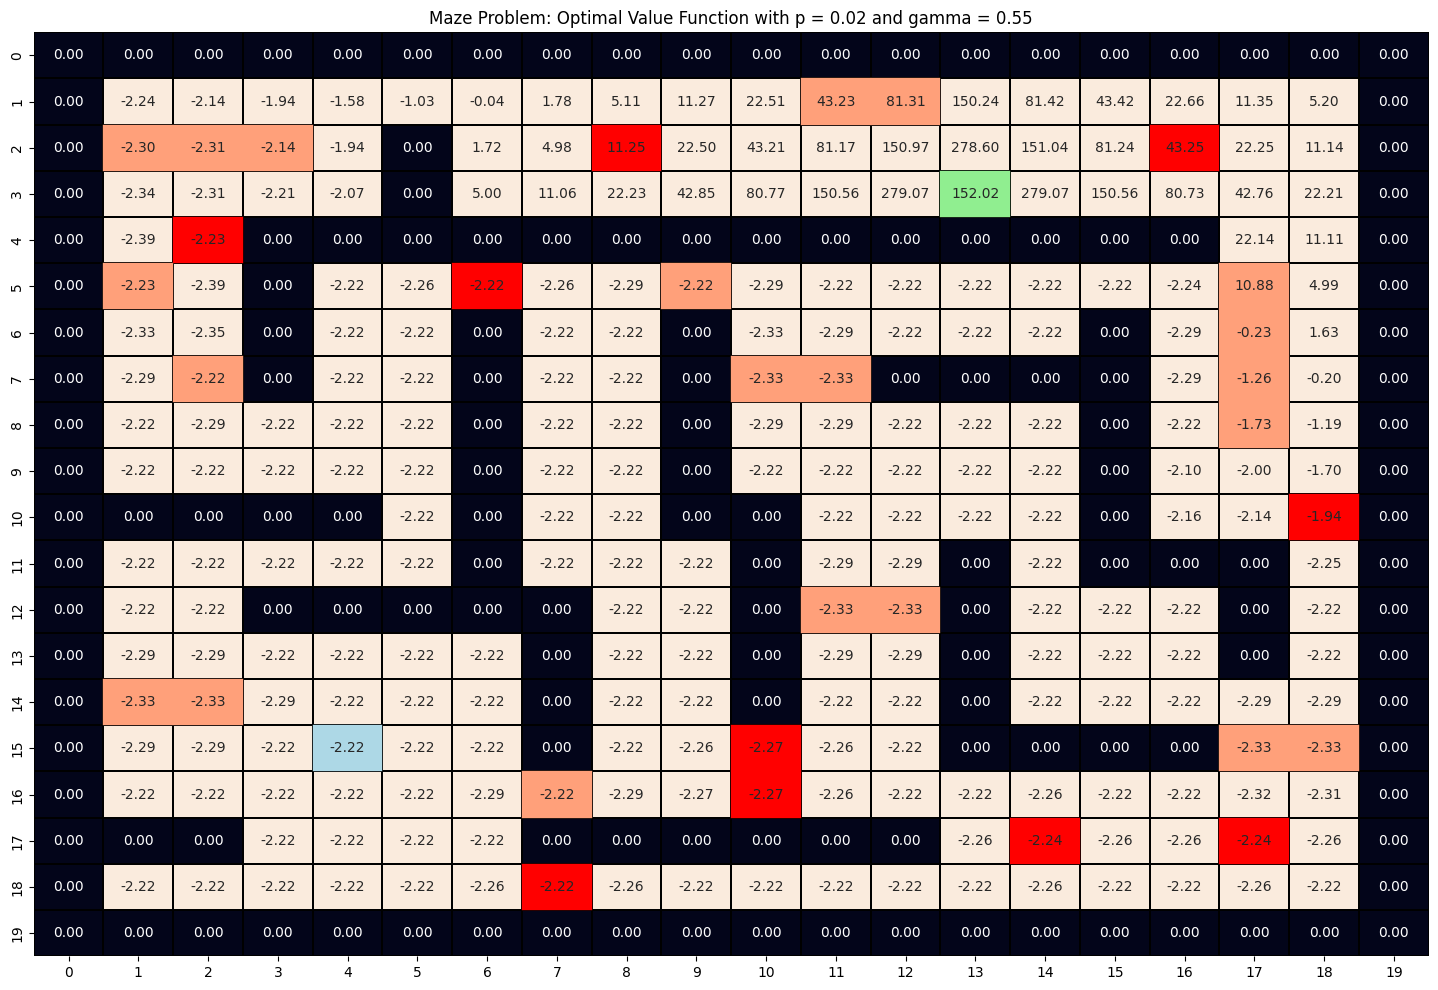

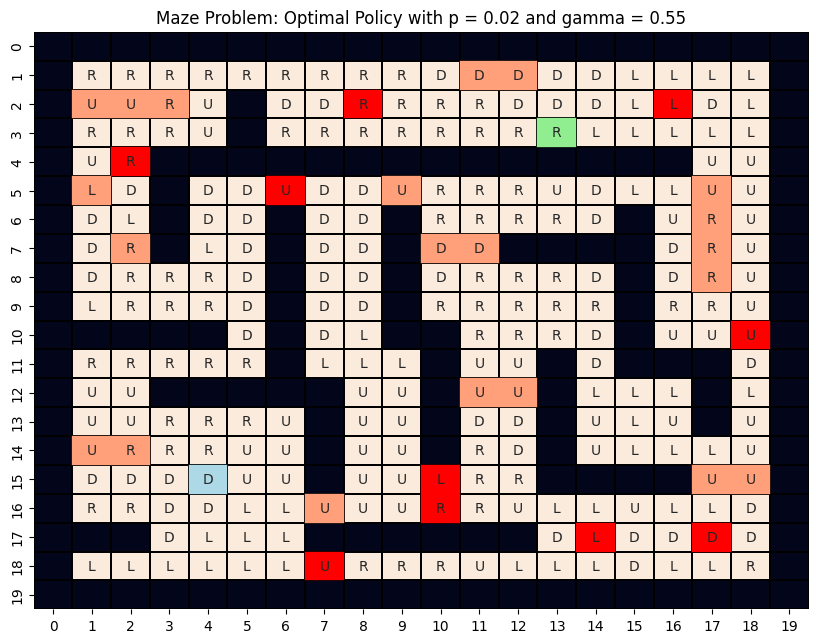

In [18]:
print("\t \t \t \t \t \t \t Policy Iteration \n")
value_function_plot(V_optimal_1c,p=0.02,gamma=0.55)
print()
policy_plot(Pi_optimal_1c,p=0.02,gamma=0.55)
print()
#Get_path(Pi_optimal_1c,p=0.02,gamma=0.55)

##Value Iteration

In [19]:
def Value_Iteration(Vs_t,p,gamma,theta):
  p1 = 1 - p
  p2 = p/3

  x = 0
  V_oldd = Vs_t.copy()     #Vs_t = np.zeros((20,20))

  while True:

    V_neww = np.zeros((20,20))

    for i in range(18):
      for j in range(18):

        if State_Matrix[i+1,j+1] == 255: #Value is a wall
          continue

        Rewards, ns_x , ns_y = next_state(i,j)

        #exp1, exp2, exp3, exp4, new_val = 0, 0, 0, 0, 0

        R1 = Rewards[0]
        ns_left_x = ns_x[0]
        ns_left_y = ns_y[0]

        R2 = Rewards[1]
        ns_up_x = ns_x[1]
        ns_up_y = ns_y[1]

        R3 = Rewards[2]
        ns_right_x = ns_x[2]
        ns_right_y = ns_y[2]

        R4 = Rewards[3]
        ns_down_x = ns_x[3]
        ns_down_y = ns_y[3]


        #Left
        exp1 = p1* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
        exp2 = p2* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
        exp3 = p2* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
        exp4 = p2* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
        val_left = exp1 + exp2 + exp3 + exp4

        #Up
        exp1 = p2* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
        exp2 = p1* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
        exp3 = p2* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
        exp4 = p2* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
        val_up = exp1 + exp2 + exp3 + exp4

        #Right
        exp1 = p2* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
        exp2 = p2* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
        exp3 = p1* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
        exp4 = p2* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
        val_right = exp1 + exp2 + exp3 + exp4

        #Down
        exp1 = p2* (R1 + gamma*V_oldd[ns_left_x, ns_left_y])   #Left
        exp2 = p2* (R2 + gamma*V_oldd[ns_up_x, ns_up_y])       #Up
        exp3 = p2* (R3 + gamma*V_oldd[ns_right_x, ns_right_y]) #Right
        exp4 = p1* (R4 + gamma*V_oldd[ns_down_x, ns_down_y])   #Down
        val_down = exp1 + exp2 + exp3 + exp4

        """
        print("V co-ordinates: ", i+1,j+1)
        print(" Left R1: ", R1)
        print(" Up R2: ", R2)
        print(" Right R3: ", R3)
        print(" Down R4: ", R4)
        #print("Action taken: ", action)
        print("Next co-ordinates x: ", ns_x)
        print("Next co-ordinates y: ", ns_y)
        #print("New V Value: ", new_val)
        print(val_left,val_up,val_right,val_down)
        """

        V_neww[i+1,j+1] = max(val_left,val_up,val_right,val_down)
        #print("Vnew ", V_neww[i+1,j+1])

    diff = np.max(np.absolute(V_neww - V_oldd))
    #print(diff)

    if diff < theta:
      break

    else:
      V_oldd = V_neww.copy()
      x+=1

  return V_neww, x

In [20]:
def Obtain_Optimal_P(Vv_optimal,p,gamma):
  p1 = 1 - p
  p2 = p/3
  Final_policy = np.zeros((18,18))

  for i in range(18):
    for j in range(18):

      if State_Matrix[i+1,j+1] == 255: #Value is a wall
        continue

      Rewards, ns_x , ns_y = next_state(i,j)

      #exp1, exp2, exp3, exp4, new_val = 0, 0, 0, 0, 0

      R1 = Rewards[0]
      ns_left_x = ns_x[0]
      ns_left_y = ns_y[0]

      R2 = Rewards[1]
      ns_up_x = ns_x[1]
      ns_up_y = ns_y[1]

      R3 = Rewards[2]
      ns_right_x = ns_x[2]
      ns_right_y = ns_y[2]

      R4 = Rewards[3]
      ns_down_x = ns_x[3]
      ns_down_y = ns_y[3]


      #Left
      exp1 = p1* (R1 + gamma*Vv_optimal[ns_left_x, ns_left_y])   #Left
      exp2 = p2* (R2 + gamma*Vv_optimal[ns_up_x, ns_up_y])       #Up
      exp3 = p2* (R3 + gamma*Vv_optimal[ns_right_x, ns_right_y]) #Right
      exp4 = p2* (R4 + gamma*Vv_optimal[ns_down_x, ns_down_y])   #Down
      val_left = exp1 + exp2 + exp3 + exp4

      #Up
      exp1 = p2* (R1 + gamma*Vv_optimal[ns_left_x, ns_left_y])   #Left
      exp2 = p1* (R2 + gamma*Vv_optimal[ns_up_x, ns_up_y])       #Up
      exp3 = p2* (R3 + gamma*Vv_optimal[ns_right_x, ns_right_y]) #Right
      exp4 = p2* (R4 + gamma*Vv_optimal[ns_down_x, ns_down_y])   #Down
      val_up = exp1 + exp2 + exp3 + exp4

      #Right
      exp1 = p2* (R1 + gamma*Vv_optimal[ns_left_x, ns_left_y])   #Left
      exp2 = p2* (R2 + gamma*Vv_optimal[ns_up_x, ns_up_y])       #Up
      exp3 = p1* (R3 + gamma*Vv_optimal[ns_right_x, ns_right_y]) #Right
      exp4 = p2* (R4 + gamma*Vv_optimal[ns_down_x, ns_down_y])   #Down
      val_right = exp1 + exp2 + exp3 + exp4

      #Down
      exp1 = p2* (R1 + gamma*Vv_optimal[ns_left_x, ns_left_y])   #Left
      exp2 = p2* (R2 + gamma*Vv_optimal[ns_up_x, ns_up_y])       #Up
      exp3 = p2* (R3 + gamma*Vv_optimal[ns_right_x, ns_right_y]) #Right
      exp4 = p1* (R4 + gamma*Vv_optimal[ns_down_x, ns_down_y])   #Down
      val_down = exp1 + exp2 + exp3 + exp4

      if max(val_left, val_right, val_up, val_down) == val_left:
        Final_policy[i,j] = 0

      elif max(val_left, val_right, val_up, val_down) == val_up:
        Final_policy[i,j] = 1

      elif max(val_left, val_right, val_up, val_down) == val_right:
        Final_policy[i,j] = 2

      elif max(val_left, val_right, val_up, val_down) == val_down:
        Final_policy[i,j] = 3

      else:
        continue

  return Final_policy

A. 𝑝= 0.02, 𝛾 = 0.95, 𝜃 = 0.01 (Base Scenario)

In [21]:
Vv_optimal_2a, x = Value_Iteration(np.zeros((20,20)),p=0.02,gamma=0.95,theta=0.01)
Final_policy_2a = Obtain_Optimal_P(Vv_optimal_2a,p=0.02,gamma=0.95)

	 	 	 	 	 	 	 Value Iteration 



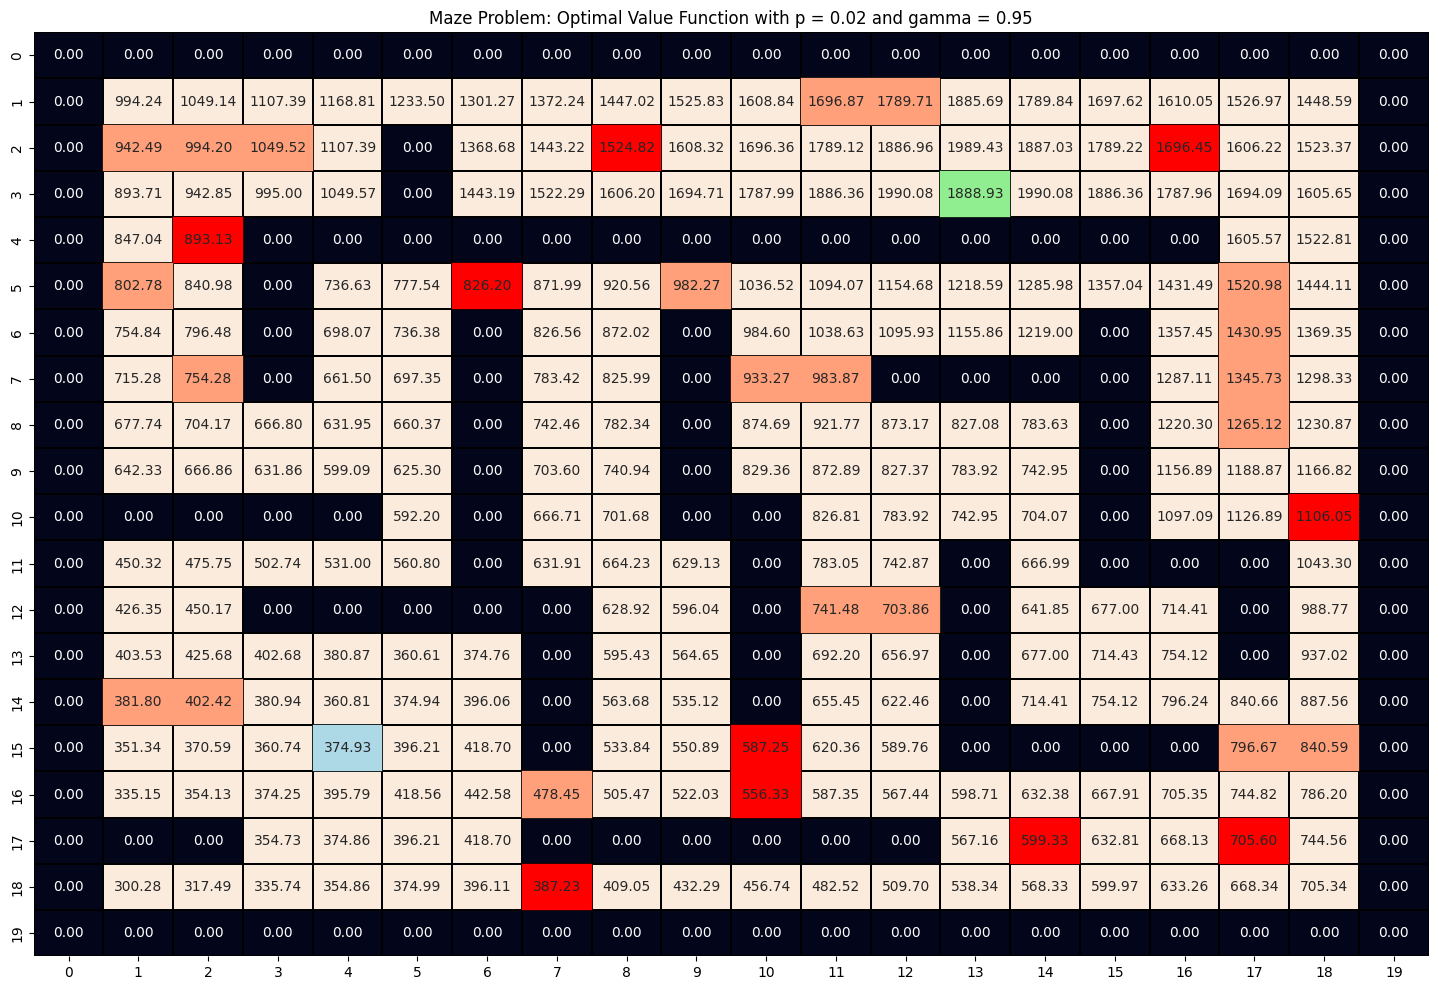

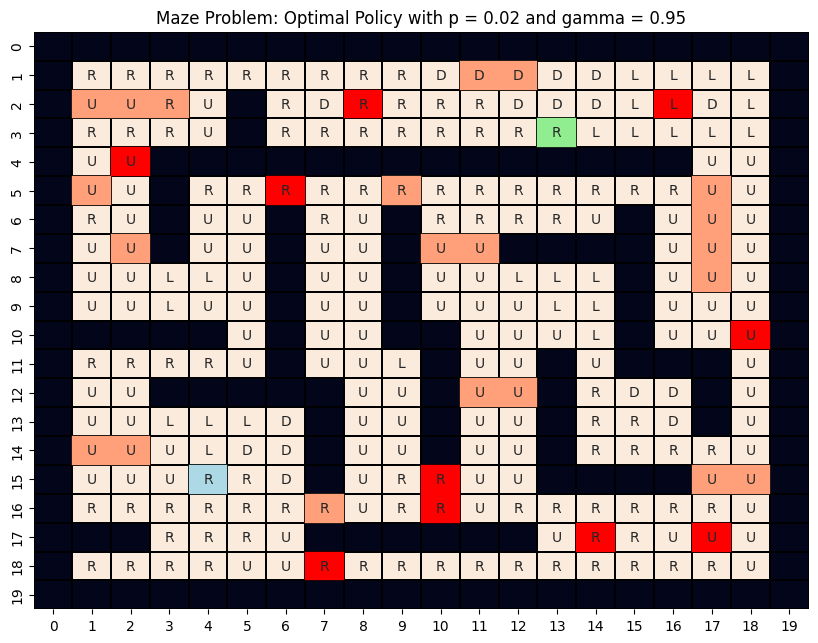

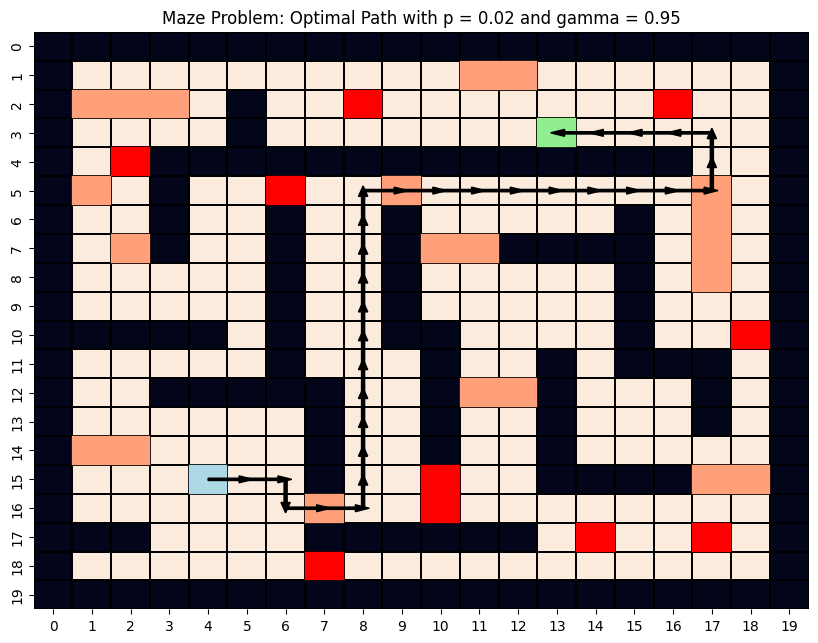

In [22]:
print("\t \t \t \t \t \t \t Value Iteration \n")
value_function_plot(Vv_optimal_2a,p=0.02,gamma=0.95)
print()
policy_plot(Final_policy_2a,p=0.02,gamma=0.95)
print()
Get_path(Final_policy_2a,p=0.02,gamma=0.95)

B. 𝑝= 0.5, 𝛾 = 0.95, 𝜃 = 0.01 (Large Stochasticity Scenario)

In [23]:
Vv_optimal_2b, x = Value_Iteration(np.zeros((20,20)),p=0.5,gamma=0.95,theta=0.01)
Final_policy_2b = Obtain_Optimal_P(Vv_optimal_2b,p=0.5,gamma=0.95)

	 	 	 	 	 	 	 Value Iteration 



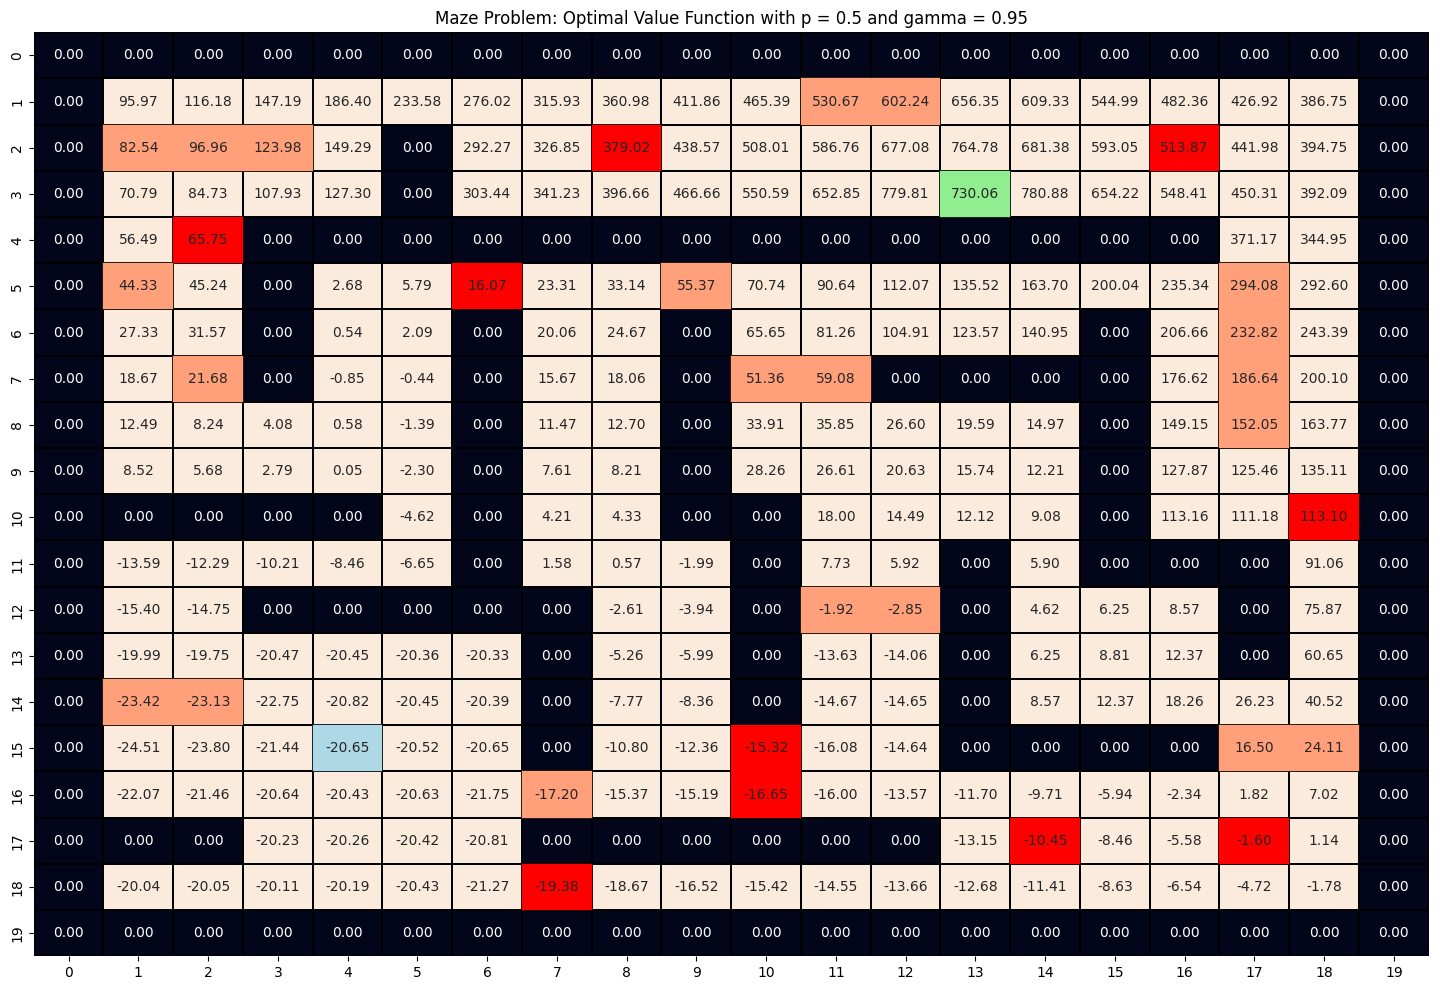

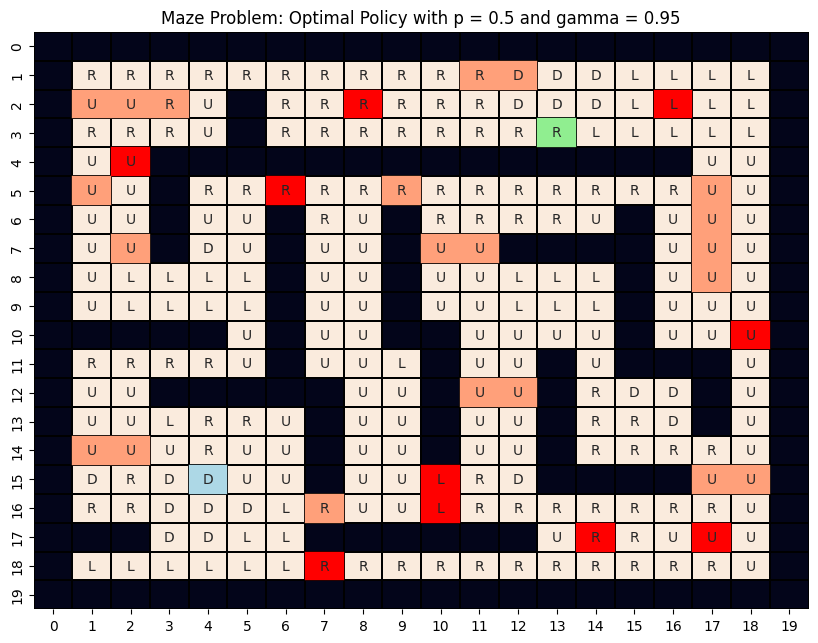

In [24]:
print("\t \t \t \t \t \t \t Value Iteration \n")
value_function_plot(Vv_optimal_2b,p=0.5,gamma=0.95)
print()
policy_plot(Final_policy_2b,p=0.5,gamma=0.95)
print()
#Get_path(Final_policy_2b,p=0.5,gamma=0.95)

C. 𝑝= 0.02, 𝛾 = 0.55, 𝜃 = 0.01 (Small Discount Factor Scenario)

In [25]:
Vv_optimal_2c, x = Value_Iteration(np.zeros((20,20)),p=0.02,gamma=0.55,theta=0.01)
Final_policy_2c = Obtain_Optimal_P(Vv_optimal_2c,p=0.02,gamma=0.55)

	 	 	 	 	 	 	 Value Iteration 



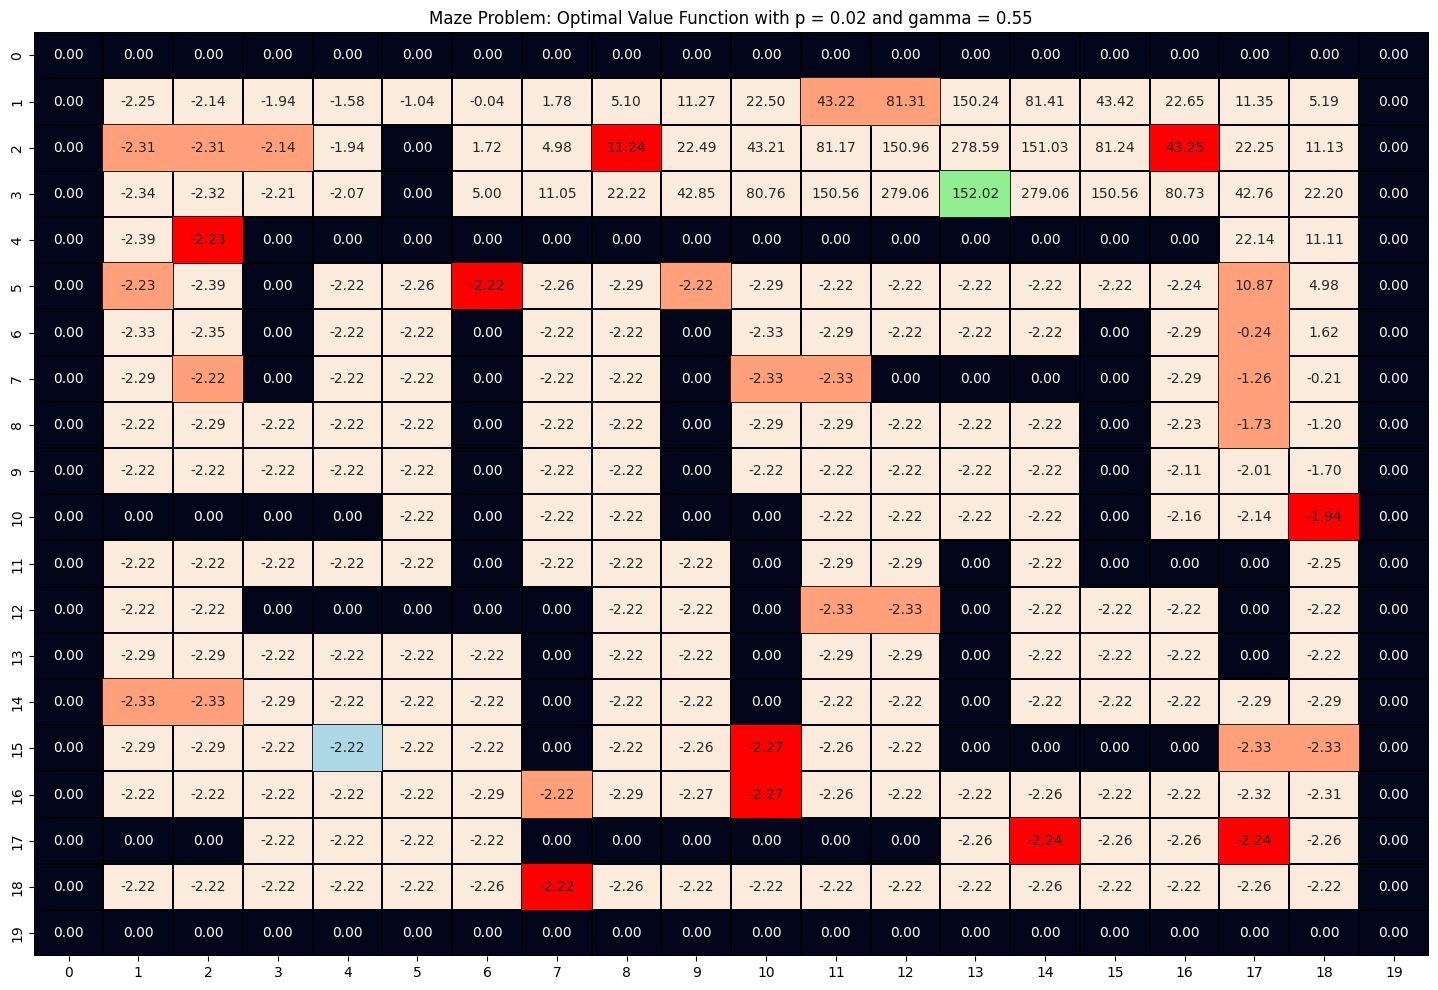

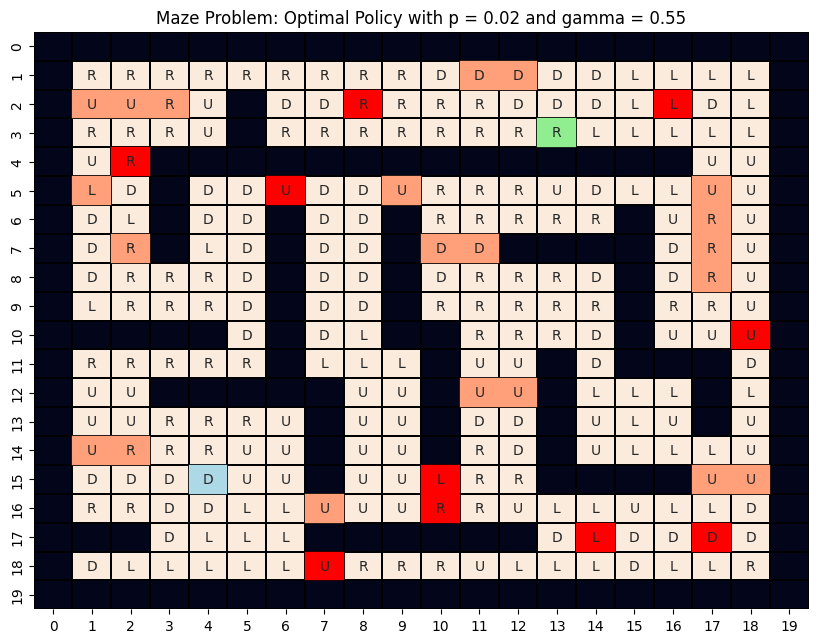

In [26]:
print("\t \t \t \t \t \t \t Value Iteration \n")
value_function_plot(Vv_optimal_2c,p=0.02,gamma=0.55)
print()
policy_plot(Final_policy_2c,p=0.02,gamma=0.55)
print()
#Get_path(Final_policy_2c,p=0.02,gamma=0.55)

##Part 3: